As a first step of designing a new ligand for our target JNK-1, the structure sequence of JNK-1 was acquired from UniProt (http://www.uniprot.org/) (UniProt ID: P45983). From UniProt additional information was also obtained, including the sequence length: 427 amino acids, the status: UniProtKB reviewed (Swiss-Prot), the Protein Existence: Evidence at protein level and finally the mass (kDa): 48,296. Moreover, BLAST (Basic Local Alignment Search Tool, under ‘Advanced’) was used in order to find similar targets based on sequence in the same species (Homo sapiens), and the first hit that is not an isoform of JNK-1 was used for the alignment part of the study. By doing this search, ‘JNK2/3 in complex with 3-(4-{[(2-chlorophenyl)carbamoyl]amino}-1H-pyrazol-1-yl)-N-(2-methylpyridin-4-yl)benzamide [Homo sapiens]’ was used as the similar target, with sequence ID: 4w4v and length of 366 amino acids.

In [1]:
# First we import the right python modules.
import nglview
import os
import shutil
from Bio.PDB import PDBParser, PDBIO, Select,  PDBList, MMCIFParser, StructureAlignment
import Bio.Align
import os
from pathlib import Path
import rdkit

In [2]:
# and the local scripts
from scripts import viewer
from scripts import bio_align

/opt/conda/lib/python3.9/site-packages/Bio/SubsMat/__init__.py:126: BiopythonDeprecationWarning: Bio.SubsMat has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.substitution_matrices as a replacement, and contact the Biopython developers if you still need the Bio.SubsMat module.
  warnings.warn(


In [3]:
HOMEDIR = str(Path.home())
os.chdir(HOMEDIR)
# We need to check whether the directory is there
try:
    os.mkdir('Bioinformatics')
except:
    print("Directory already exists")
os.chdir('Bioinformatics')

Directory already exists


In [4]:
# In order to retrieve the 3D structure of our protein we used the pdb code of JNK-1, 2GMX. 

TARGET_PDB_ID = "2gmx" 

import nglview
view = nglview.show_pdbid(TARGET_PDB_ID)
view

NGLWidget()

In [5]:
# Moreover, in order to design new drugs it is crucial to investigate the interactions of the co-crystalized ligand 
# with JNK-1. For this, we retrieved the RCSB code of the ligand, 877.

LIGAND_CODE = "877" 

view.center(LIGAND_CODE)
view

NGLWidget()

In [6]:
# In order to observe the most important interactions between the ligand and the protein, 
# we visualize the interactions within 5 Angstrom of the ligand. 

# For this step we downloaded the coordinates of 2GMX from RCSB.

pdbl = PDBList()
pdbl.retrieve_pdb_file(TARGET_PDB_ID, pdir=TARGET_PDB_ID)

Structure exists: '2gmx/2gmx.cif' 


'2gmx/2gmx.cif'

In [7]:
# Next, we generate a BioPython object from the coordinates, which we can use for various tasks.
parser = MMCIFParser()
structure = parser.get_structure("TARGETPROT",'{}/{}.cif'.format(TARGET_PDB_ID,TARGET_PDB_ID))

/opt/conda/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5892.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5929.
  warnings.warn(


In [8]:
#had to capitalize gmx in the file bioinformatics so that it runs

os. getcwd()

'/home/jovyan/Bioinformatics'

In [9]:
class ResSelect(Select):
    def accept_residue(self, residue):
        if residue.get_resname() == LIGAND_CODE:
            return 1
        else:
            return 0

class NonHetSelect(Select):
    def accept_residue(self, residue):
        return 1 if residue.id[0] == " " else 0

io = PDBIO()
io.set_structure(structure)
io.save("ligand-{}.pdb".format(LIGAND_CODE), ResSelect())
io.save("protein-{}.pdb".format(TARGET_PDB_ID), NonHetSelect())



command = '../CBR_teaching/bin/lepro protein-{}.pdb'.format(TARGET_PDB_ID)
os.system(command)
shutil.move('pro.pdb','{}_prepped.pdb'.format(TARGET_PDB_ID))

'2gmx_prepped.pdb'

In [10]:
# combine protein and ligand files
filenames = [
'{}_prepped.pdb'.format(TARGET_PDB_ID),
"ligand-{}.pdb".format(LIGAND_CODE)
]
with open('{}-complex.pdb'.format(TARGET_PDB_ID), 'w') as outfile:
    for fname in filenames:
        with open(fname) as infile:
            for line in infile:
                if not "END" in line:
                    outfile.write(line)


with open('{}-complex.pdb'.format(TARGET_PDB_ID)) as f:
    view = nglview.show_file(f, ext="pdb")
    
view.center(LIGAND_CODE)
viewer.show_residues_around(view, selection=LIGAND_CODE)
view

#And part of the final steps of the alignment we found the off-target pdb ID 4w4v which corresponds to 
#the first sequence that is not an isoform of JNK-1, retrieved from BLAST 
#(JNK2/3 in complex with 3-(4-{[(2-chlorophenyl)carbamoyl]amino}-1H-pyrazol-1-yl)-N-(2 -methylpyridin-4-yl)benzamide 
#[Homo sapiens].
#4w4v

OFF_TARGET_PDB_ID = "4w4v" 
OFF_TARGET_LIGAND = "3H8"  

pdbl = PDBList()
pdbl.retrieve_pdb_file(OFF_TARGET_PDB_ID, pdir=OFF_TARGET_PDB_ID)

parser = MMCIFParser()
structure = parser.get_structure("TARGETPROT",'{}/{}.cif'.format(OFF_TARGET_PDB_ID,OFF_TARGET_PDB_ID))

class ResSelect(Select):
    def accept_residue(self, residue):
        if residue.get_resname() == OFF_TARGET_LIGAND:
            return 1
        else:
            return 0

io = PDBIO()
io.set_structure(structure)
io.save("ligand-{}.pdb".format(OFF_TARGET_LIGAND), ResSelect())
io.save("protein-{}.pdb".format(OFF_TARGET_PDB_ID), NonHetSelect())


command = '../CBR_teaching/bin/lepro protein-{}.pdb'.format(OFF_TARGET_PDB_ID)
os.system(command)
shutil.move('pro.pdb','{}_prepped.pdb'.format(OFF_TARGET_PDB_ID))


# combine protein and ligand files
filenames = [
'{}_prepped.pdb'.format(OFF_TARGET_PDB_ID),
"ligand-{}.pdb".format(OFF_TARGET_LIGAND)
]
with open('{}-complex.pdb'.format(OFF_TARGET_PDB_ID), 'w') as outfile:
    for fname in filenames:
        with open(fname) as infile:
            for line in infile:
                if not "END" in line:
                    outfile.write(line)


with open('{}-complex.pdb'.format(OFF_TARGET_PDB_ID)) as f:
    view = nglview.show_file(f, ext="pdb")
    
view.center(OFF_TARGET_LIGAND)
viewer.show_residues_around(view, selection=OFF_TARGET_LIGAND)
view

#We also replaced the names of the first and second structure

from Bio import pairwise2
from Bio.Seq import Seq 
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment

# Get the structures
PDBCODE_1 = '2gmx' # Name of the first structure
PDBCODE_2 = '4w4v' # Name of the second structure

import requests
data = requests.get(f'https://www.ebi.ac.uk/pdbe/api/pdb/entry/molecules/{PDBCODE_1}').json()[PDBCODE_1.lower()]
SEQ1 = (data[0]['sequence'])
SEQ1 = Seq(SEQ1)

data = requests.get(f'https://www.ebi.ac.uk/pdbe/api/pdb/entry/molecules/{PDBCODE_2}').json()[PDBCODE_2.lower()]
SEQ2 = (data[0]['sequence'])
SEQ2 = Seq(SEQ2)

alignments = pairwise2.align.globalxx(SEQ1, SEQ2)

for align1, align2, score, begin, end in alignments:
    filename = "alignment.fasta"
    with open(filename, "w") as handle:
        handle.write(">SEQ1\n%s\n>SEQ2\n%s\n" % (align1, align2))

print(alignments[0])

bio_align.run('{}-complex.pdb'.format(TARGET_PDB_ID),'{}-complex.pdb'.format(OFF_TARGET_PDB_ID))

Structure exists: '4w4v/4w4v.cif' 


/opt/conda/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


Alignment(seqA='M--SR-SKR-DNN-FYSVEI-GDSTFTVLKRYQNLKPIGSGAQGIVCAAYDAI-LE-RNVAIKKLSRPFQNQTHAKRAYRELVLMKCVNHKNIIG-LLNVFTPQKS-LEEFQDVYI-VMELMDANLCQVIQMELDHERMSYLLYQMLCGIKHLHSAGIIHRDLKPSNIVVKSDCTLKILDFGLARTAGTSFMME-PE-VVTRYYRAPEVILGMGYKENVDL-WSVGCIMGEMVC-HKILFPGRDYIDQWNKVIEQLGTPCPEFMKKLQPTVRT-YVENRPKYAGYS--FE-KLFPDV-LFPADSEHNKLKASQARDLLSKMLVID-ASKRISVDE-ALQHPYINVWYDPSEAE--APPPK-IP-DKQLDEREHTIEEWKELIYKEVMDL--EHHHHHH', seqB='MAMS-KSK-VD-NQFYSVE-VGDSTFTVLKRYQNLKPIGSGAQGIVCAAYDA-VL-DRNVAIKKLSRPFQNQTHAKRAYRELVLMKCVNHKNII-SLLNVFTPQK-TLEEFQDVY-LVMELMDANLCQVIQMELDHERMSYLLYQMLCGIKHLHSAGIIHRDLKPSNIVVKSDCTLKILDFGLARTAGTSFMM-TP-YVVTRYYRAPEVILGMGYKENVD-IWSVGCIMGEMV-RHKILFPGRDYIDQWNKVIEQLGTPCPEFMKKLQPTVR-NYVENRPKYAG--LTF-PKLFPD-SLFPADSEHNKLKASQARDLLSKMLVIDPA-KRISVD-DALQHPYINVWYDP--AEVEAPPP-QI-YDKQLDEREHTIEEWKELIYKEVM--NSE------', score=338.0, start=0, end=398)


/opt/conda/lib/python3.9/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Invalid or missing occupancy at line 2.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Invalid or missing B factor at line 2.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/opt/conda/lib/python3.9/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Invalid or missing occupancy at line 3.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/Bio/PDB/PDBParser.py

In [11]:
# combine protein and ligand files
filenames = [
'{}-complex.pdb'.format(TARGET_PDB_ID,TARGET_PDB_ID),
"{}-complex_transformed.pdb".format(OFF_TARGET_PDB_ID)
]
with open('{}-{}-merged.pdb'.format(TARGET_PDB_ID,OFF_TARGET_PDB_ID), 'w') as outfile:
    for fname in filenames:
        with open(fname) as infile:
            for line in infile:
                if not "END" in line:
                    outfile.write(line)
                    
with open('{}-{}-merged.pdb'.format(TARGET_PDB_ID,OFF_TARGET_PDB_ID)) as f:
    view = nglview.show_file(f, ext="pdb")
    
view

NGLWidget()

In [12]:
# We will load some libraries again first

from pathlib import Path
from warnings import filterwarnings
import time

import pandas as pd
import numpy as np
from sklearn import svm, metrics, clone
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import auc, accuracy_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import MACCSkeys
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect

#from teachopencadd.utils import seed_everything

# Silence some expected warnings
filterwarnings("ignore")
# Fix seed for reproducible results
SEED = 22
#seed_everything(SEED)

In [13]:
import os
from pathlib import Path
HOMEDIR = str(Path.home())
os.chdir(HOMEDIR)
# We need to check whether the directory is there
try:
    os.mkdir('Cheminformatics')
except:
    print("Directory already exists")
os.chdir('Cheminformatics')

Directory already exists


The ChEMBL ID of our protein is CHEMBL2276 and the file downloaded was renamed accordingly. 
Some additional information that was kept for future use were the following:
SMILES of 2gmx: CCOC1=C(C(=CC(=N1)NC(=O)CC2=CC(=C(C=C2OC)Br)OC)N)C#N
SMILES ligand 877 retrieved from PubChem: CCOc1nc(NC(=O)Cc2cc(OC)c(Br)cc2OC)cc(N)c1C#N 
InckiKey 877 ligand GKODDLYLEKSDJL-UHFFFAOYSA-N --> chemblID: CHEMBL382639


With the tanimoto threshold changed to 80% we found 125 results from: 
#https://pubchem.ncbi.nlm.nih.gov/#query=CID6852206%20structure&tab=similarity&similaritythreshold=80

for 95% --> we found 1 compound
for 90% --> we found 1 compound

Pubchem has more compounds than the ChEMBL data base

Usin the Zinc site with 70 % similarity (Tanimoto 70, written as similarity -30), we found 4 hits. 

In [14]:
CHEMBLID = 'CHEMBL382639' 
FILENAME = 'CHEMBL382639.tsv' 

data = pd.read_csv(FILENAME, sep='\t')

print("There are a total of {} datapoints in this set".format(len(data)))
data.head()

There are a total of 4886 datapoints in this set


,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
0,CHEMBL175603,NaN,0,246.27,0,2.64,8,Fc1ccc(Sc2ncnc3[nH]cnc23)cc1,Inhibition,'=',...,c-Jun N-terminal kinase 1,Homo sapiens,SINGLE PROTEIN,CHEMBL1141882,1,Scientific Literature,J. Med. Chem.,2005.0,None,NaN
1,CHEMBL362629,NaN,0,243.25,0,2.25,6,Cn1cnc2c(Nc3ccc(F)cc3)ncnc21,Inhibition,'=',...,c-Jun N-terminal kinase 1,Homo sapiens,SINGLE PROTEIN,CHEMBL1141882,1,Scientific Literature,J. Med. Chem.,2005.0,None,NaN
2,CHEMBL175730,NaN,0,274.32,0,2.79,16,Cn1cnc2c(SCc3ccc(F)cc3)ncnc21,Inhibition,'=',...,c-Jun N-terminal kinase 1,Homo sapiens,SINGLE PROTEIN,CHEMBL1141882,1,Scientific Literature,J. Med. Chem.,2005.0,None,NaN
3,CHEMBL102346,NaN,0,485.54,0,4.79,21,COc1cc2ncnc(N3CCN(C(=O)Nc4ccc(Oc5ccccc5)cc4)CC...,NT,NaN,...,c-Jun N-terminal kinase 1,Homo sapiens,SINGLE PROTEIN,CHEMBL1135502,1,Scientific Literature,J. Med. Chem.,2002.0,None,NaN
4,CHEMBL1934353,NaN,0,568.10,1,3.85,14b,CN(c1ccccc1-c1cc(Cl)c2cnc(Nc3ccc(C4CCN(CC(N)=O...,Inhibition,'=',...,c-Jun N-terminal kinase 1,Homo sapiens,SINGLE PROTEIN,CHEMBL1932974,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2012.0,None,NaN


In [15]:
pd_data = data[['Molecule ChEMBL ID','pChEMBL Value','Smiles','Assay Type', 'Standard Relation','Standard Value']]
pd_data.rename(columns={'pChEMBL Value': 'pChEMBL_value', 'Assay Type':'Assay_Type'}, inplace=True)
pd_data.head()

,Molecule ChEMBL ID,pChEMBL_value,Smiles,Assay_Type,Standard Relation,Standard Value
0,CHEMBL175603,NaN,Fc1ccc(Sc2ncnc3[nH]cnc23)cc1,B,'=',0.0
1,CHEMBL362629,NaN,Cn1cnc2c(Nc3ccc(F)cc3)ncnc21,B,'=',5.0
2,CHEMBL175730,NaN,Cn1cnc2c(SCc3ccc(F)cc3)ncnc21,B,'=',10.0
3,CHEMBL102346,NaN,COc1cc2ncnc(N3CCN(C(=O)Nc4ccc(Oc5ccccc5)cc4)CC...,B,NaN,NaN
4,CHEMBL1934353,NaN,CN(c1ccccc1-c1cc(Cl)c2cnc(Nc3ccc(C4CCN(CC(N)=O...,B,'=',36.0


In [16]:
import numpy as np
# Add column for activity
pd_data["active"] = np.zeros(len(pd_data))

# Mark every molecule as active with an pCHEMBL of >= 6.5, 0 otherwise
pd_data.loc[pd_data[pd_data.pChEMBL_value >= 6.5].index, "active"] = 1.0

# NBVAL_CHECK_OUTPUT
print("Number of active compounds:", int(pd_data.active.sum()))
print("Number of inactive compounds:", len(pd_data) - int(pd_data.active.sum()))

Number of active compounds: 997
Number of inactive compounds: 3889


In [17]:
pd_data.drop(pd_data[pd_data.Assay_Type != 'B'].index, inplace=True)

print("We have a total of {} activity points left".format(len(pd_data)))

We have a total of 3893 activity points left


In [19]:
# Set path to this notebook
HERE = Path(_dh[-1])
DATA = HERE / "data"

In [20]:
def smiles_to_fp(smiles, method="maccs", n_bits=2048):
    """
    Encode a molecule from a SMILES string into a fingerprint.

    Parameters
    ----------
    smiles : str
        The SMILES string defining the molecule.

    method : str
        The type of fingerprint to use. Default is MACCS keys.

    n_bits : int
        The length of the fingerprint.

    Returns
    -------
    array
        The fingerprint array.

    """

    # convert smiles to RDKit mol object
    try:
        mol = Chem.MolFromSmiles(smiles)
        
    except:
        return('NaN')

    if method == "maccs":
        return np.array(MACCSkeys.GenMACCSKeys(mol))
    if method == "morgan2":
        return np.array(GetMorganFingerprintAsBitVect(mol, 2, nBits=n_bits))
    if method == "morgan3":
        return np.array(GetMorganFingerprintAsBitVect(mol, 3, nBits=n_bits))
    else:
        # NBVAL_CHECK_OUTPUT
        print(f"Warning: Wrong method specified: {method}. Default will be used instead.")
        return np.array(MACCSkeys.GenMACCSKeys(mol))

In [21]:
compound_df = pd_data.copy()

In [22]:
# Add column for fingerprint
compound_df["fp"] = compound_df["Smiles"].apply(smiles_to_fp)
compound_df.drop(compound_df[compound_df.fp == 'NaN'].index, inplace=True)
compound_df.head(3)

,Molecule ChEMBL ID,pChEMBL_value,Smiles,Assay_Type,Standard Relation,Standard Value,active,fp
0,CHEMBL175603,NaN,Fc1ccc(Sc2ncnc3[nH]cnc23)cc1,B,'=',0.0,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,CHEMBL362629,NaN,Cn1cnc2c(Nc3ccc(F)cc3)ncnc21,B,'=',5.0,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,CHEMBL175730,NaN,Cn1cnc2c(SCc3ccc(F)cc3)ncnc21,B,'=',10.0,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [23]:
def plot_roc_curves_for_models(models, test_x, test_y, save_png=True):
    """
    Helper function to plot customized roc curve.

    Parameters
    ----------
    models: dict
        Dictionary of pretrained machine learning models.
    test_x: list
        Molecular fingerprints for test set.
    test_y: list
        Associated activity labels for test set.
    save_png: bool
        Save image to disk (default = False)

    Returns
    -------
    fig:
        Figure.
    """

    fig, ax = plt.subplots()

    # Below for loop iterates through your models list
    for model in models:
        # Select the model
        ml_model = model["model"]
        # Prediction probability on test set
        test_prob = ml_model.predict_proba(test_x)[:, 1]
        # Prediction class on test set
        test_pred = ml_model.predict(test_x)
        # Compute False postive rate and True positive rate
        fpr, tpr, thresholds = metrics.roc_curve(test_y, test_prob)
        # Calculate Area under the curve to display on the plot
        auc = roc_auc_score(test_y, test_prob)
        # Plot the computed values
        ax.plot(fpr, tpr, label=(f"{model['label']} AUC area = {auc:.2f}"))

    # Custom settings for the plot
    ax.plot([0, 1], [0, 1], "r--")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title("Receiver Operating Characteristic")
    ax.legend(loc="lower right")
    # Save plot
    if save_png:
        fig.savefig(f"results/roc_auc", dpi=300, bbox_inches="tight", transparent=True)
    return fig

In [24]:
def model_performance(ml_model, test_x, test_y, verbose=True):
    """
    Helper function to calculate model performance

    Parameters
    ----------
    ml_model: sklearn model object
        The machine learning model to train.
    test_x: list
        Molecular fingerprints for test set.
    test_y: list
        Associated activity labels for test set.
    verbose: bool
        Print performance measure (default = True)

    Returns
    -------
    tuple:
        Accuracy, sensitivity, specificity, auc on test set.
    """

    # Prediction probability on test set
    test_prob = ml_model.predict_proba(test_x)[:, 1]

    # Prediction class on test set
    test_pred = ml_model.predict(test_x)

    # Performance of model on test set
    accuracy = accuracy_score(test_y, test_pred)
    sens = recall_score(test_y, test_pred)
    spec = recall_score(test_y, test_pred, pos_label=0)
    auc = roc_auc_score(test_y, test_prob)

    if verbose:
        # Print performance results
        # NBVAL_CHECK_OUTPUT        print(f"Accuracy: {accuracy:.2}")
        print(f"Sensitivity: {sens:.2f}")
        print(f"Specificity: {spec:.2f}")
        print(f"AUC: {auc:.2f}")

    return accuracy, sens, spec, auc

In [25]:
def model_training_and_validation(ml_model, name, splits, verbose=True):
    """
    Fit a machine learning model on a random train-test split of the data
    and return the performance measures.

    Parameters
    ----------
    ml_model: sklearn model object
        The machine learning model to train.
    name: str
        Name of machine learning algorithm: RF, SVM, ANN
    splits: list
        List of desciptor and label data: train_x, test_x, train_y, test_y.
    verbose: bool
        Print performance info (default = True)

    Returns
    -------
    tuple:
        Accuracy, sensitivity, specificity, auc on test set.

    """
    train_x, test_x, train_y, test_y = splits

    # Fit the model
    ml_model.fit(train_x, train_y)

    # Calculate model performance results
    accuracy, sens, spec, auc = model_performance(ml_model, test_x, test_y, verbose)

    return accuracy, sens, spec, auc

In [26]:
fingerprint_to_model = compound_df.fp.tolist()
label_to_model = compound_df.active.tolist()

(
    static_train_x,
    static_test_x,
    static_train_y,
    static_test_y,
) = train_test_split(fingerprint_to_model, label_to_model, test_size=0.2, random_state=12)
splits = [static_train_x, static_test_x, static_train_y, static_test_y]
# NBVAL_CHECK_OUTPUT
print("Training data size:", len(static_train_x))
print("Test data size:", len(static_test_x))

Training data size: 3113
Test data size: 779


In [27]:
# We start with the random forest classifier
# Set model parameter for random forest
param = {
    "n_estimators": 100,  # number of trees to grows
    "criterion": "entropy",  # cost function to be optimized for a split
}
model_RF = RandomForestClassifier(**param)

In [28]:
# Fit model on single split
performance_measures = model_training_and_validation(model_RF, "RF", splits)

Sensitivity: 0.77
Specificity: 0.94
AUC: 0.94


Directory already exists, continuing


'/home/jovyan/Cheminformatics/results/roc_auc.png'

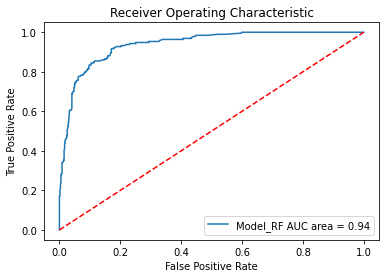

In [29]:
# Initialize the list that stores all models. First one is RF.
models = [{"label": "Model_RF", "model": model_RF}]
try:
    os.mkdir('results')
except:
    print("Directory already exists, continuing")
# Plot roc curve
plot_roc_curves_for_models(models, static_test_x, static_test_y)
result_img = '{}/results/roc_auc.png'.format(os.getcwd())
result_img

We continued with the support vector classifier
Here we train a SVM with a radial-basis function kernel (also: squared-exponential kernel). Which gave the following information;
 
Sensitivity: 0.71
Specificity: 0.96
AUC: 0.93

In [30]:
# Specify model
model_SVM = svm.SVC(kernel="rbf", C=1, gamma=0.1, probability=True)

# Fit model on single split
performance_measures = model_training_and_validation(model_SVM, "SVM", splits)

Sensitivity: 0.71
Specificity: 0.96
AUC: 0.93


'/home/jovyan/Cheminformatics/results/roc_auc.png'

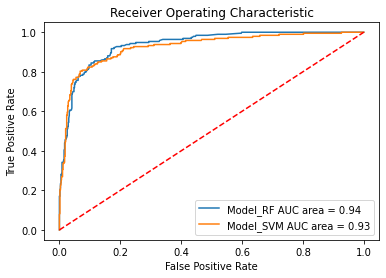

In [31]:
# Append SVM model
models.append({"label": "Model_SVM", "model": model_SVM})
# Plot roc curve
plot_roc_curves_for_models(models, static_test_x, static_test_y)
result_img = '{}/results/roc_auc.png'.format(os.getcwd())
result_img

And finally we also tested with the Neural network classifier
We train an MLPClassifier (Multi-layer Perceptron classifier) with 3 layers, each with 5 neurons. As before, we do the crossvalidation procedure and plot the results. 
 
This approach gave the following information;
Sensitivity: 0.62
Specificity: 0.95
AUC: 0.90

In [32]:
# Specify model
model_ANN = MLPClassifier(hidden_layer_sizes=(5, 3), random_state=12)

# Fit model on single split
performance_measures = model_training_and_validation(model_ANN, "ANN", splits)

Sensitivity: 0.62
Specificity: 0.95
AUC: 0.90


'/home/jovyan/Cheminformatics/results/roc_auc.png'

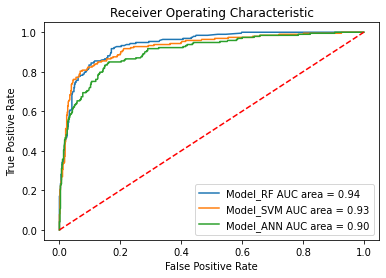

In [33]:
# Append ANN model
models.append({"label": "Model_ANN", "model": model_ANN})
# Plot roc curve
plot_roc_curves_for_models(models, static_test_x, static_test_y, True)
result_img = '{}/results/roc_auc.png'.format(os.getcwd())
result_img

We used cross-validation of 3 folds.

In [34]:
def crossvalidation(ml_model, df, n_folds=5, verbose=False):
    """
    Machine learning model training and validation in a cross-validation loop.

    Parameters
    ----------
    ml_model: sklearn model object
        The machine learning model to train.
    df: pd.DataFrame
        Data set with SMILES and their associated activity labels.
    n_folds: int, optional
        Number of folds for cross-validation.
    verbose: bool, optional
        Performance measures are printed.

    Returns
    -------
    None

    """
    t0 = time.time()
    # Shuffle the indices for the k-fold cross-validation
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=SEED)

    # Results for each of the cross-validation folds
    acc_per_fold = []
    sens_per_fold = []
    spec_per_fold = []
    auc_per_fold = []

    # Loop over the folds
    for train_index, test_index in kf.split(df):
        # clone model -- we want a fresh copy per fold!
        fold_model = clone(ml_model)
        # Training

        # Convert the fingerprint and the label to a list
        train_x = df.iloc[train_index].fp.tolist()
        train_y = df.iloc[train_index].active.tolist()

        # Fit the model
        fold_model.fit(train_x, train_y)

        # Testing

        # Convert the fingerprint and the label to a list
        test_x = df.iloc[test_index].fp.tolist()
        test_y = df.iloc[test_index].active.tolist()

        # Performance for each fold
        accuracy, sens, spec, auc = model_performance(fold_model, test_x, test_y, verbose)

        # Save results
        acc_per_fold.append(accuracy)
        sens_per_fold.append(sens)
        spec_per_fold.append(spec)
        auc_per_fold.append(auc)

    # Print statistics of results
    print(
        f"Mean accuracy: {np.mean(acc_per_fold):.2f} \t"
        f"and std : {np.std(acc_per_fold):.2f} \n"
        f"Mean sensitivity: {np.mean(sens_per_fold):.2f} \t"
        f"and std : {np.std(sens_per_fold):.2f} \n"
        f"Mean specificity: {np.mean(spec_per_fold):.2f} \t"
        f"and std : {np.std(spec_per_fold):.2f} \n"
        f"Mean AUC: {np.mean(auc_per_fold):.2f} \t"
        f"and std : {np.std(auc_per_fold):.2f} \n"
        f"Time taken : {time.time() - t0:.2f}s\n"
    )

    return acc_per_fold, sens_per_fold, spec_per_fold, auc_per_fold

In [35]:
N_FOLDS = 3

In [36]:
for model in models:
    print("\n======= ")
    print(f"{model['label']}")
    crossvalidation(model["model"], compound_df, n_folds=N_FOLDS)


Model_RF
Mean accuracy: 0.88 	and std : 0.01 
Mean sensitivity: 0.70 	and std : 0.02 
Mean specificity: 0.94 	and std : 0.00 
Mean AUC: 0.92 	and std : 0.00 
Time taken : 1.65s


Model_SVM
Mean accuracy: 0.89 	and std : 0.01 
Mean sensitivity: 0.69 	and std : 0.02 
Mean specificity: 0.95 	and std : 0.00 
Mean AUC: 0.91 	and std : 0.00 
Time taken : 11.96s


Model_ANN
Mean accuracy: 0.86 	and std : 0.01 
Mean sensitivity: 0.58 	and std : 0.01 
Mean specificity: 0.93 	and std : 0.00 
Mean AUC: 0.88 	and std : 0.01 
Time taken : 6.84s



In [37]:
# Reset data frame
compound_df = compound_df.drop(['fp'], axis=1)

In [38]:
# Use Morgan fingerprint with radius 3
compound_df["fp"] = compound_df["Smiles"].apply(smiles_to_fp, args=("morgan3",))
compound_df.head(3)
# NBVAL_CHECK_OUTPUT

,Molecule ChEMBL ID,pChEMBL_value,Smiles,Assay_Type,Standard Relation,Standard Value,active,fp
0,CHEMBL175603,NaN,Fc1ccc(Sc2ncnc3[nH]cnc23)cc1,B,'=',0.0,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,CHEMBL362629,NaN,Cn1cnc2c(Nc3ccc(F)cc3)ncnc21,B,'=',5.0,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,CHEMBL175730,NaN,Cn1cnc2c(SCc3ccc(F)cc3)ncnc21,B,'=',10.0,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [39]:
for model in models:
    if model["label"] == "Model_SVM":
        # SVM is super slow with long fingerprints
        # and will have a performance similar to RF
        # We can skip it in this test, but if you want
        # to run it, feel free to replace `continue` with `pass`
        continue
    print("\n=======")
    print(model["label"])
    reduced_df = compound_df[['active','fp']]
    crossvalidation(model["model"], reduced_df, n_folds=N_FOLDS)


Model_RF
Mean accuracy: 0.89 	and std : 0.00 
Mean sensitivity: 0.71 	and std : 0.02 
Mean specificity: 0.95 	and std : 0.00 
Mean AUC: 0.94 	and std : 0.00 
Time taken : 6.50s


Model_ANN
Mean accuracy: 0.89 	and std : 0.01 
Mean sensitivity: 0.74 	and std : 0.02 
Mean specificity: 0.93 	and std : 0.00 
Mean AUC: 0.93 	and std : 0.01 
Time taken : 76.80s



In [40]:
def crossvalidation_reg(ml_model, df, n_folds=5, verbose=False):
    """
    Machine learning model training and validation in a cross-validation loop.

    Parameters
    ----------
    ml_model: sklearn model object
        The machine learning model to train.
    df: pd.DataFrame
        Data set with SMILES and their associated activity labels.
    n_folds: int, optional
        Number of folds for cross-validation.
    verbose: bool, optional
        Performance measures are printed.

    Returns
    -------
    None

    """
    t0 = time.time()
    # Shuffle the indices for the k-fold cross-validation
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=SEED)

    # Results for each of the cross-validation folds
    MAE_per_fold = []
    RMSE_per_fold = []

    # Loop over the folds
    for train_index, test_index in kf.split(df):
        # clone model -- we want a fresh copy per fold!
        fold_model = clone(ml_model)
        # Training

        # Convert the fingerprint and the label to a list
        train_x = df.iloc[train_index].fp.tolist()
        train_y = df.iloc[train_index].pChEMBL_value.tolist()

        # Fit the model
        fold_model.fit(train_x, train_y)

        # Testing

        # Convert the fingerprint and the label to a list
        test_x = df.iloc[test_index].fp.tolist()
        test_y = df.iloc[test_index].pChEMBL_value.tolist()
        
        test_results = fold_model.predict(test_x)
        # Prediction probability on test set
        from sklearn import metrics

        MAE_per_fold.append(metrics.mean_absolute_error(test_y, test_results))
        #print('Mean Squared Error (MSE):', metrics.mean_squared_error(test_y, test_results))
        RMSE_per_fold.append(np.sqrt(metrics.mean_squared_error(test_y, test_results)))
        #mape = np.mean(np.abs((gt - pred) / np.abs(gt)))
        #print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
        #print('Accuracy:', round(100*(1 - mape), 2))
    return(MAE_per_fold,RMSE_per_fold,fold_model)

In [41]:
fingerprint_to_model = compound_df.fp.tolist()
label_to_model = compound_df.pChEMBL_value.tolist()

# Split data randomly in train and test set
# note that we use test/train_x for the respective fingerprint splits
# and test/train_y for the respective label splits
(
    static_train_x,
    static_test_x,
    static_train_y,
    static_test_y,
) = train_test_split(fingerprint_to_model, label_to_model, test_size=0.2, random_state=12)
splits = [static_train_x, static_test_x, static_train_y, static_test_y]
# NBVAL_CHECK_OUTPUT
print("Training data size:", len(static_train_x))
print("Test data size:", len(static_test_x))

Training data size: 3113
Test data size: 779


In [42]:
# Kick out NaN in the pChEMBL values
compound_df_noNaN = compound_df.dropna()

# Append RF Regressor model
#models.append({"label": "Model_RF_reg", "model": RandomForestRegressor})
#Train model with RandomForestRegressor
regressor = RandomForestRegressor()
MAE, RMSE,trained_model = crossvalidation_reg(regressor , compound_df_noNaN, n_folds=N_FOLDS)

print(
f"MAE: {np.mean(MAE):.2f} \t"
f"and std : {np.std(MAE):.2f} \n"
f"RMSE: {np.mean(RMSE):.2f} \t"
f"and std : {np.std(RMSE):.2f} \n"
)

MAE: 0.49 	and std : 0.02 
RMSE: 0.67 	and std : 0.02 



Where, typically, an MAE/RMSE<0.6, approximately, is considered quite decent

In [43]:
 test_smiles = [
    'CCOc1nc(NC(=O)Cc2cc(OC)c(Br)cc2OC)cc(N)c1C#N', #CHEMBL382639
    'FC1=CC(F)=CC(F)=C1NC2=NC(C(N2[C@H]3CCOC3)=N4)=CN=C4N[C@H]5CC[C@H](O)CC5', #tanzesertib
    'NC(C=C1)=CC=C1NC2=NC(C(N2[C@H]3CCOC3)=N4)=CN=C4N[C@H]5CC[C@H](O)CC5', #ownligandwithNH2
    'NC(C=C1)=C(N)C=C1NC2=NC(C(N2[C@H]3CCOC3)=N4)=CN=C4N[C@H]5CC[C@H](O)CC5', #ownligandwith2NH2
    'C1CCN(CC1)CCOC2=CC=CC(=C2)C3=NNC4=C3C=C(C=C4)C5=NC=NN5', #CC-401
    'NC1=CC=CC(C2=NNC3=C2C=C(C4=NC=NN4)C=C3)=C1' #ownligand


]

fps = []

for smiles in test_smiles: 
    fp = smiles_to_fp(smiles,'morgan3')
    fps.append(fp)

predictions = trained_model.predict(fps)
print("SMILES, PREDICTION")
for i, prediction in enumerate(predictions):
    print('{},{:.2f}'.format(test_smiles[i], prediction))

SMILES, PREDICTION
CCOc1nc(NC(=O)Cc2cc(OC)c(Br)cc2OC)cc(N)c1C#N,7.20
FC1=CC(F)=CC(F)=C1NC2=NC(C(N2[C@H]3CCOC3)=N4)=CN=C4N[C@H]5CC[C@H](O)CC5,7.15
NC(C=C1)=CC=C1NC2=NC(C(N2[C@H]3CCOC3)=N4)=CN=C4N[C@H]5CC[C@H](O)CC5,7.04
NC(C=C1)=C(N)C=C1NC2=NC(C(N2[C@H]3CCOC3)=N4)=CN=C4N[C@H]5CC[C@H](O)CC5,7.04
C1CCN(CC1)CCOC2=CC=CC(=C2)C3=NNC4=C3C=C(C=C4)C5=NC=NN5,6.44
NC1=CC=CC(C2=NNC3=C2C=C(C4=NC=NN4)C=C3)=C1,6.69


For the Machine Learning part of the study three different approaches were used to classify our molecules, Random Forest (RF), Support Vector Machine (SVM) and Artificial Neural Network (ANN). As seen from our results, all three models performed well on the dataset that was used. However, the Random Forest (RF) and the Support Vector Machine (SVM), showed an higher mean AUC of 94% and 93% respectively, whereas the Artificial Neural Network (ANN) had a mean AUC of 90%. The slightly increased performance of the RF and SVM models could be attributed to a few different reasons. Firstly, the dataset used for the ML may have been easily separable in active/inactive with some simple tree-like decisions or with the radial basis function, characteristics of RF and SVM respectively. Moreover, the ANN may have required a slightly larger dataset to be trained on. Finally, having an additional model of validation is crucial for the evaluation of the models. Nonetheless, all models seem to be predictive. For the last steps of running predictions on the newly generated molecules, the Random Forest ML model was used. For this study, MACCs keys were used as part of the learning process. Indeed, the use of longer fingerprints results in a slightly better performance of the model. However, MACCs was chosen over Morgan fingerprint. 
